In [1]:
import pandas as pd
import ujson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import *
import csv
from tqdm import tqdm

In [12]:
df = pd.read_csv('/shared/0/projects/cross-lingual-exchange/data/dataframes/BE.tsv', sep='\t', 
                 names=['user_id','lang', 'bilinguality', 'country', 'betw', 'num_tweets', 
                        'followers', 'following', 'hashtag_count', 'url_count', 'degree'])
df.head()

,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree
0,user_id,lang,page_rank,eigen_cent,bilinguality,country,betw,custom_label,NaN,NaN,NaN
1,569350090,NL,5.748433821762058e-06,3.0288515322106993e-05,1.0,Belgium,7.324404931222038e-09,NL,NaN,NaN,NaN
2,569413745,NL,4.050604176678785e-06,0.000160565383506,0.9929577465,Belgium,0.0,nl<1,NaN,NaN,NaN
3,58773,NL,2.502865228731439e-06,1.9530778780427212e-05,1.0,Belgium,0.0,NL,NaN,NaN,NaN
4,1708038163,NL,2.186799295808435e-06,0.00020473817879200002,1.0,Belgium,0.0,NL,NaN,NaN,NaN


In [13]:
df.set_index('user_id', inplace=True)

In [19]:
#df = df.loc[(df['followers'] <= 5000) & (df['following'] <= 5000)].copy()

In [20]:
def custom_type(bi):
    if bi == 0:
        return 'fr'
    elif bi < 0.25:
        return 'fr<0.25'
    elif bi < 0.75:
        return '0.25<x<0.75'
    elif bi < 1:
        return 'nl<1'
    else:
        return 'nl'
df['custom_label'] = df['bilinguality'].apply(custom_type)

TypeError: '<' not supported between instances of 'str' and 'float'

In [21]:
df.head()

,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree
user_id,,,,,,,,,,
user_id,lang,page_rank,eigen_cent,bilinguality,country,betw,custom_label,NaN,NaN,NaN
569350090,NL,5.748433821762058e-06,3.0288515322106993e-05,1.0,Belgium,7.324404931222038e-09,NL,NaN,NaN,NaN
569413745,NL,4.050604176678785e-06,0.000160565383506,0.9929577465,Belgium,0.0,nl<1,NaN,NaN,NaN
58773,NL,2.502865228731439e-06,1.9530778780427212e-05,1.0,Belgium,0.0,NL,NaN,NaN,NaN
1708038163,NL,2.186799295808435e-06,0.00020473817879200002,1.0,Belgium,0.0,NL,NaN,NaN,NaN


In [16]:
Counter(df['custom_label'])

KeyError: 'custom_label'

In [17]:
ranges = [0, 25, max(df.following)]
df.groupby(pd.cut(df.following, ranges)).count().num_tweets

ValueError: could not convert string to float: 'nl<1'

In [18]:
df.groupby(['country', 'lang']).count()

,,bilinguality,betw,num_tweets,followers,following,hashtag_count,url_count,degree
country,lang,,,,,,,,
0.00010027685398300001,NL,1,1,1,1,1,0,0,0
0.00010052271199800001,NL,1,1,1,1,1,0,0,0
0.000100751325229,NL,1,1,1,1,1,0,0,0
0.00010083687214100001,NL,1,1,1,1,1,0,0,0
0.000100849251199,BI,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
9.99440656154444e-06,NL,1,1,1,1,1,0,0,0
9.994998361019648e-11,NL,1,1,1,1,1,0,0,0
9.996039088118475e-16,FR,1,1,1,1,1,0,0,0


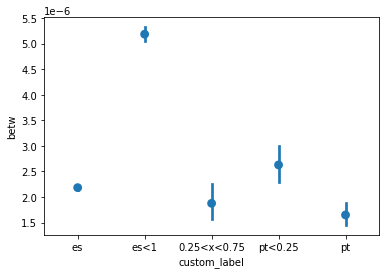

In [10]:
ax = sns.pointplot(x="custom_label", y="betw", data=df, join=False,
                   order=['nl', 'nl<1', '0.25<x<0.75', 'fr<0.25', 'fr'])

In [2]:
df = pd.read_csv('/shared/2/projects/cross-lingual-exchange/data/network_calculations/ES_PT.tsv',sep='\t')

KeyboardInterrupt: 

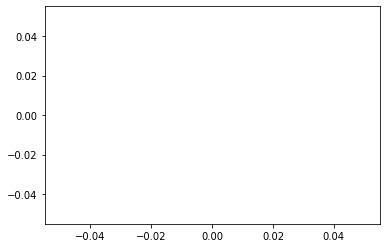

In [8]:
sns.histplot(df['betw'])

In [9]:
df['betw']

0          6.778660e-06
1          7.303326e-05
2          4.971687e-06
3          3.867990e-05
4          4.094156e-05
               ...     
5364583    0.000000e+00
5364584    3.180541e-13
5364585    0.000000e+00
5364586    2.049758e-09
5364587    0.000000e+00
Name: betw, Length: 5364588, dtype: float64

In [10]:
df['betw'].mean()

9.310546492726081e-07

In [12]:
df

,uid,degree,betw,pagerank
0,2147483670,159,6.778660e-06,1.535892e-06
1,86808330,421,7.303326e-05,4.212567e-06
2,376673342,39,4.971687e-06,5.178990e-07
3,399692942,157,3.867990e-05,1.659283e-06
4,387349127,209,4.094156e-05,2.271208e-06
...,...,...,...,...
5364583,2147484664,2,0.000000e+00,5.413817e-08
5364584,709056148914245632,2,3.180541e-13,7.362884e-08
5364585,4294967775,1,0.000000e+00,4.073546e-08
5364586,4152147748,4,2.049758e-09,6.213193e-08


<AxesSubplot:ylabel='betw'>

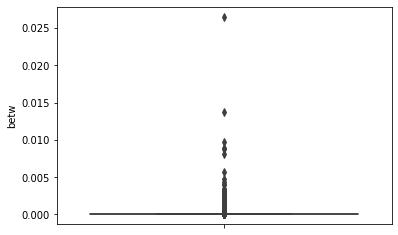

In [14]:
sns.boxplot(y=df['betw'])

In [21]:
import numpy as np

In [23]:
df['log_betw'] = np.log(10**6*df['betw']+1)

In [24]:
df

,uid,degree,betw,pagerank,log_betw
0,2147483670,159,6.778660e-06,1.535892e-06,2.051384e+00
1,86808330,421,7.303326e-05,4.212567e-06,4.304514e+00
2,376673342,39,4.971687e-06,5.178990e-07,1.787029e+00
3,399692942,157,3.867990e-05,1.659283e-06,3.680845e+00
4,387349127,209,4.094156e-05,2.271208e-06,3.736277e+00
...,...,...,...,...,...
5364583,2147484664,2,0.000000e+00,5.413817e-08,0.000000e+00
5364584,709056148914245632,2,3.180541e-13,7.362884e-08,3.180541e-07
5364585,4294967775,1,0.000000e+00,4.073546e-08,0.000000e+00
5364586,4152147748,4,2.049758e-09,6.213193e-08,2.047660e-03


<AxesSubplot:ylabel='betw'>

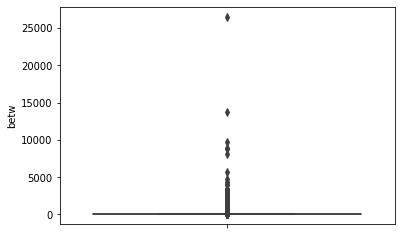

In [25]:
sns.boxplot(y=10**6*df['betw'])

<AxesSubplot:ylabel='log_betw'>

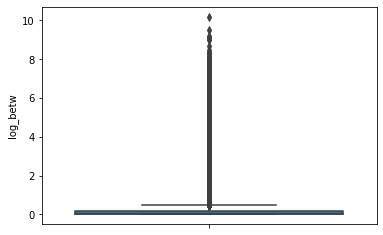

In [26]:
sns.boxplot(y=df['log_betw'])

<AxesSubplot:xlabel='log_betw', ylabel='Density'>

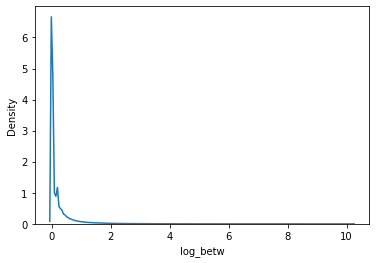

In [30]:
sns.kdeplot(df['log_betw'])

<AxesSubplot:xlabel='betw', ylabel='Density'>

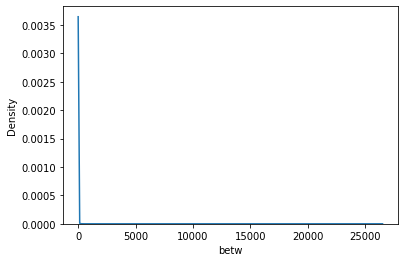

In [32]:
sns.kdeplot(10**6*df['betw'])

In [34]:
df.sort_values('betw',ascending=False)[:20]

,uid,degree,betw,pagerank,log_betw
11197,18939115,9792,0.026532,0.000166,10.186141
54584,44992826,6354,0.013682,0.000099,9.523934
13112,1499289019,3541,0.009740,0.000038,9.184132
4594,15243058,6268,0.008864,0.000090,9.089825
4054,169001667,4101,0.008758,0.000065,9.077790
5810,11254812,4201,0.008103,0.000059,9.000055
8123,125331893,2942,0.005732,0.000046,8.654066
18798,182764833,3966,0.004763,0.000063,8.468893
12209,269348688,1368,0.004323,0.000014,8.371966
3668,63182397,2189,0.004023,0.000034,8.299961
